# **1. Perkenalan Dataset**


1. **Judul**:  
   Prediksi Penempatan Mahasiswa

2. **Deskripsi**:  
   Proyek ini bertujuan untuk memprediksi apakah seorang mahasiswa akan mendapatkan penempatan kerja (Placement) berdasarkan berbagai faktor akademik dan keterampilan.

3. **Sumber Dataset**:  
* **Sumber:** Kaggle / Synthetic Data
* **Jumlah Data:** 10.000 Baris
* **Target:** `Placement` (Yes/No)
* **Fitur Utama:** IQ, CGPA, Internship Experience, Communication Skills, dll.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Menentukan path dataset
path = "../college_student_placement_dataset_raw.csv"

# Memuat dataset
df = pd.read_csv(path)

In [3]:
# Menampilkan 3 baris pertama
df.head(3)

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Cek informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [5]:
# Cek deskriptif statistik data
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


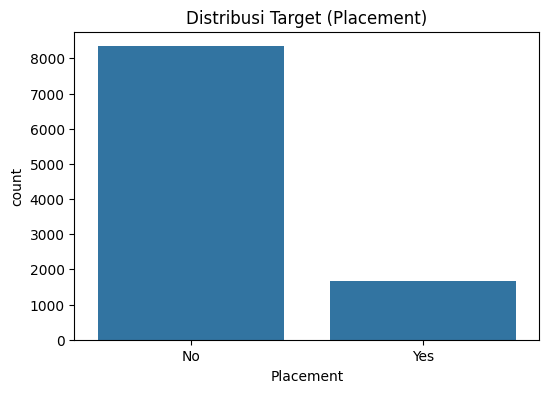

In [6]:
# Cek Distribusi Target (Placement)
plt.figure(figsize=(6, 4))
sns.countplot(x='Placement', data=df)
plt.title('Distribusi Target (Placement)')
plt.show()

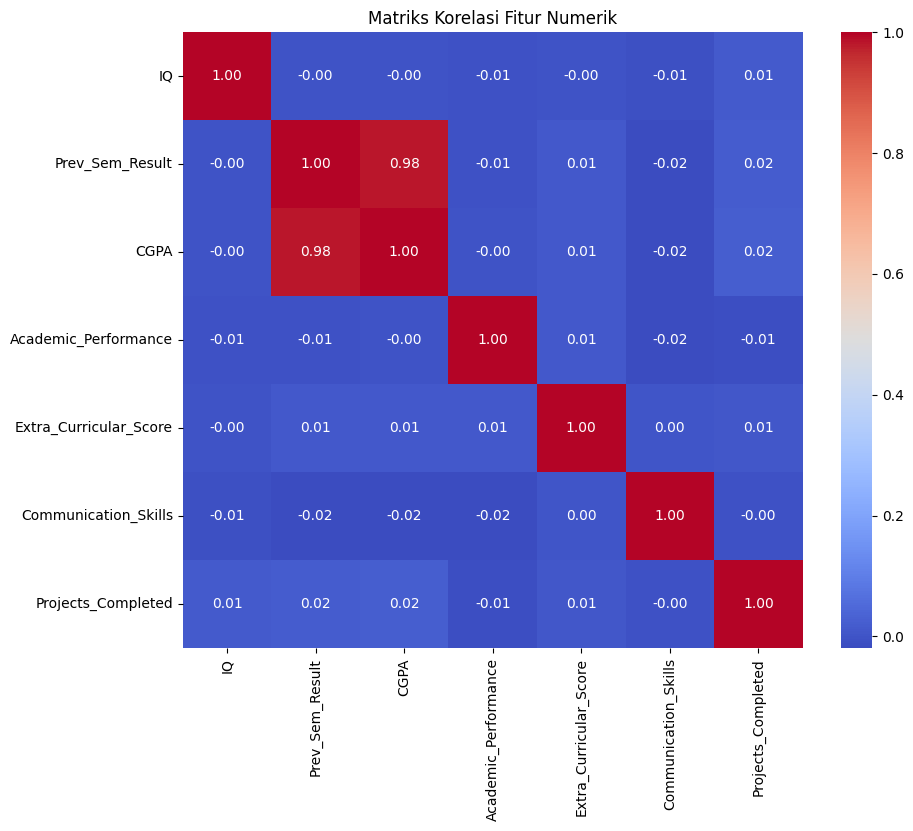

In [7]:
# Cek Korelasi (Hanya kolom numerik)
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

In [8]:
# Deteksi Outlier dengan IQR
fitur_numerik = ["IQ", "Prev_Sem_Result", "CGPA", "Academic_Performance",
                 "Extra_Curricular_Score", "Communication_Skills", "Projects_Completed"]
def deteksi_outlier(df, kolom):
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)]
    return len(outliers)

print("\nJumlah Outlier per Kolom:")
for col in fitur_numerik:
    jumlah = deteksi_outlier(df, col)
    print(f"- {col}: {jumlah} data")


Jumlah Outlier per Kolom:
- IQ: 61 data
- Prev_Sem_Result: 0 data
- CGPA: 0 data
- Academic_Performance: 0 data
- Extra_Curricular_Score: 0 data
- Communication_Skills: 0 data
- Projects_Completed: 0 data


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [9]:
# Cek missing value
df.isna().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [10]:
# Drop College_ID karena tidak berguna untuk prediksi
df = df.drop(columns=['College_ID'])

# Drop kolom duplikat    
df = df.drop_duplicates()

In [11]:
# Encoding data kategorikal
mapping = {'Yes': 1, 'No': 0}

df['Internship_Experience'] = df['Internship_Experience'].map(mapping)
df['Placement'] = df['Placement'].map(mapping)

In [12]:
# Inisialisasi Scaler
scaler = StandardScaler()

# Standarisasi fitur numerik
df[fitur_numerik] = scaler.fit_transform(df[fitur_numerik])

In [13]:
# Menampilkan 3 baris pertama
df.head(3)

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,0.500135,-0.639521,-0.851919,0.853921,0,0.958593,0.840550,0.866381,0
1,-0.164214,-1.392572,-1.470939,0.853921,0,0.642131,0.840550,-1.464794,0
2,0.633004,-1.503111,-1.158028,1.201949,0,-0.623713,-1.572644,-0.882000,0


In [14]:
# Menyimpan data bersih
df.to_csv("college_student_placement_dataset_preprocessing.csv", index=False)